In [1]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [2]:
sample = pd.read_csv("sample_submission.csv",encoding = "ISO-8859-1")
sample.head(2)

,id,target
0,0,0
1,2,0


In [3]:
test_limpio = pd.read_csv("test_limpio_con_Tf-Idf.csv",encoding = "ISO-8859-1")
test_limpio.head(2)

,aba,abandon,abc,abcnew,abl,ablaz,absolut,abstorm,abus,access,...,your,youth,youtub,youv,yr,yrs,yyc,zionist,zombi,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_limpio = pd.read_csv("train_limpio_con_Tf-Idf.csv",encoding = "ISO-8859-1")
train_limpio.shape[1]

2394

In [5]:
def reducirDimension(df):
    wantedDf = pd.DataFrame()
    for i in range(df.shape[1]):
        calculatedIndex = ((61 * i + 65) % 100)
        subtractOrAdd = 1 if ( (( (3 * i + 4) % 5) % 2) == 1) else -1
        if(calculatedIndex in wantedDf.columns):
            wantedDf[calculatedIndex] = wantedDf[calculatedIndex] + (df.iloc[:,i] * subtractOrAdd)
        else:
            wantedDf[calculatedIndex] = df.iloc[:,i] * subtractOrAdd
    
    return wantedDf        

In [6]:
from sklearn import preprocessing

def normalizar(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    return df

In [7]:
new_train = reducirDimension(train_limpio.drop(columns= ['target']))
new_train.to_csv("train_TfIdf_Dimensiones_Reducidads.csv",index=False)
new_train = normalizar(new_train)
new_test = reducirDimension(test_limpio)
new_test.to_csv("test_TfIdf_Dimensiones_Reducidas.csv",index=False)
new_test = normalizar(new_test)


In [119]:
new_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,...,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000
mean,0.977360,0.980159,0.978592,0.010474,0.013280,0.980669,0.980438,0.976979,0.024157,0.020501,...,0.969561,0.979084,0.973880,0.037241,0.024666,0.974197,0.971989,0.982160,0.020323,0.012893
std,0.106158,0.099022,0.089022,0.055553,0.065583,0.092537,0.078868,0.092291,0.102168,0.090060,...,0.106681,0.097263,0.100894,0.109065,0.098341,0.098753,0.102225,0.079277,0.089014,0.064912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
new_test.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.0,1.0,1.000000,0.0,0.0,1.0,1.0,1.0,0.000000,0.000000,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,1.0,1.0,1.000000,0.0,0.0,1.0,1.0,1.0,0.457406,0.000000,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,1.000000,0.0,0.0,1.0,1.0,1.0,0.000000,0.000000,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,1.0,1.0,1.000000,0.0,0.0,1.0,1.0,1.0,0.000000,0.429796,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1.0,1.0,0.691018,0.0,0.0,1.0,1.0,1.0,0.000000,0.000000,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [121]:
df_x= new_train
df_x.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,...,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000
mean,0.977360,0.980159,0.978592,0.010474,0.013280,0.980669,0.980438,0.976979,0.024157,0.020501,...,0.969561,0.979084,0.973880,0.037241,0.024666,0.974197,0.971989,0.982160,0.020323,0.012893
std,0.106158,0.099022,0.089022,0.055553,0.065583,0.092537,0.078868,0.092291,0.102168,0.090060,...,0.106681,0.097263,0.100894,0.109065,0.098341,0.098753,0.102225,0.079277,0.089014,0.064912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
df_y=train_limpio.target

In [123]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=4)

In [132]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [133]:
y_pred = classifier.predict(X_test)

In [134]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[388  43]
 [201 130]]
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       431
           1       0.75      0.39      0.52       331

    accuracy                           0.68       762
   macro avg       0.71      0.65      0.64       762
weighted avg       0.70      0.68      0.65       762



In [135]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

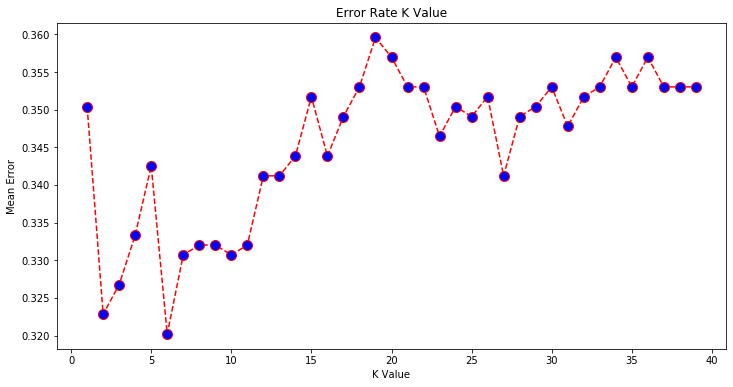

In [136]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')